# Linear Regression

**Importing the necessary library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


## Exploratory Data Analysis ie EDA

In [3]:
print("Shape : {}\nDataTypes : {}".format(df.shape , df.dtypes.value_counts()))

Shape : (1090, 9)
DataTypes : float64    9
dtype: int64


In [4]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1088.000000
mean,25.678440,32.447248,19.321651,1007.965780,63.370642,2.007982,6.484679,15.667523,108.255729
std,7.230386,6.692962,7.582759,7.550425,15.859468,0.728787,3.889221,7.568278,82.288271
min,6.700000,9.800000,0.000000,990.400000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.000000,27.700000,12.025000,1001.225000,54.000000,1.600000,3.500000,11.100000,43.958333
50%,27.900000,34.350000,21.350000,1007.950000,65.000000,1.900000,5.900000,14.800000,83.458333
75%,31.375000,37.000000,26.000000,1014.800000,75.000000,2.600000,8.900000,18.300000,152.686458
max,38.500000,45.500000,34.000000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


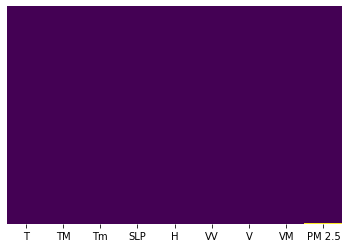

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**We can see some missing values in Pm 2.5 lets get the exact count**

In [6]:
df.isnull().sum().sort_values(ascending=False).head(3)

PM 2.5    2
VM        0
V         0
dtype: int64

**We can probably drop the 2 rows as it is**

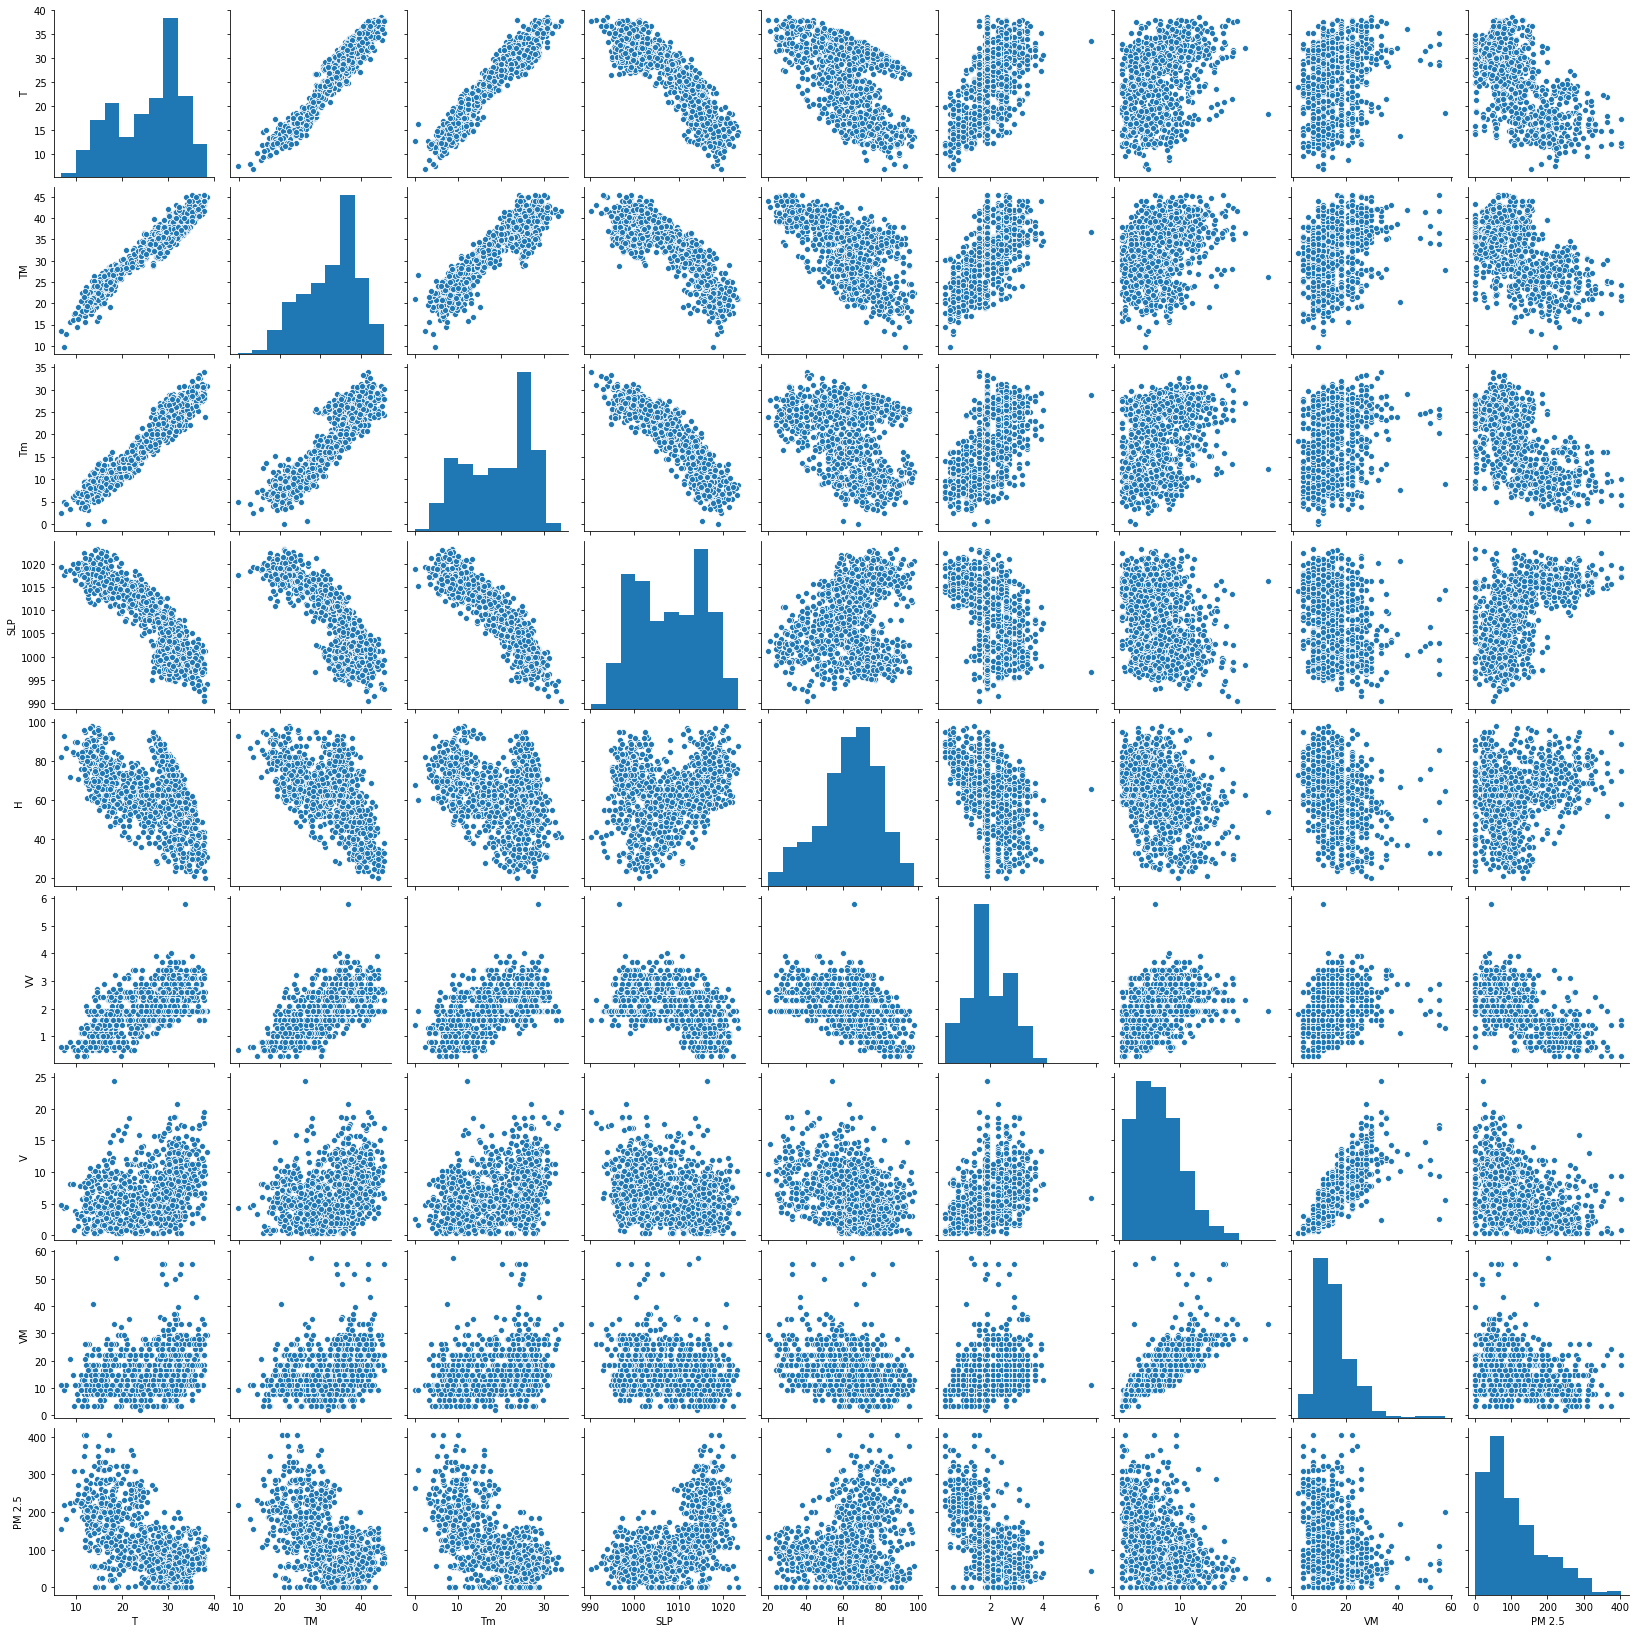

In [7]:
sns.pairplot(df)

**we can see some correaltion between some independent features we will cover this in feature engg and feature selection section**

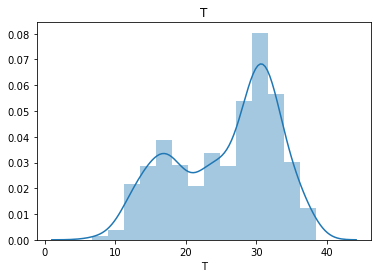

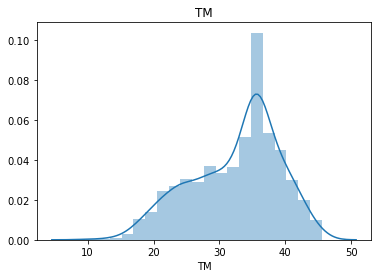

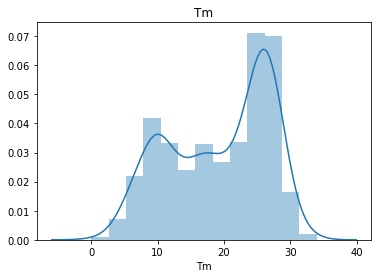

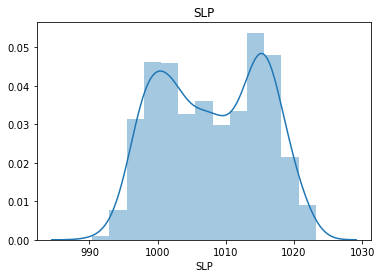

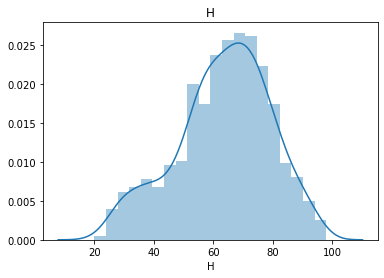

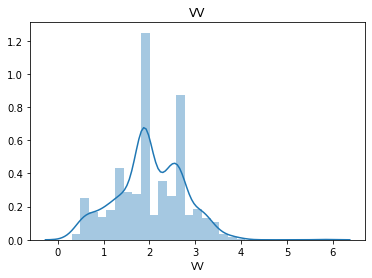

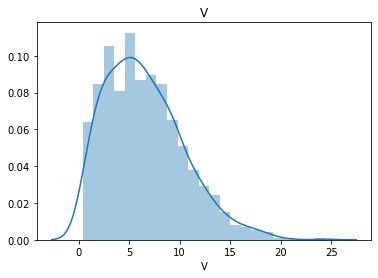

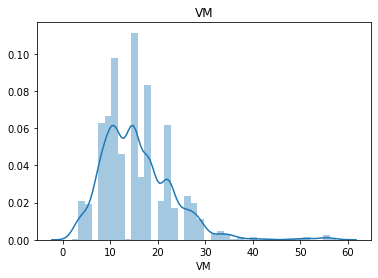

In [8]:
#lets fet the distribution of all independent variables
for col  in df.columns:
    if col != 'PM 2.5':
        sns.distplot(df[col])
        plt.title(col)
        plt.show()


##### We can see most of the indepemdent features follow a normal distribution

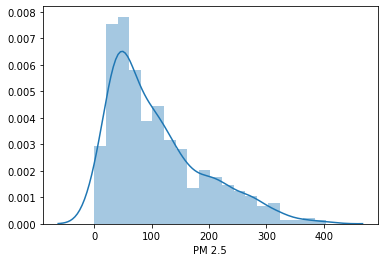

In [9]:
sns.distplot(df['PM 2.5'])

**The dependent feature is rightly skewed some what ie mean > median**

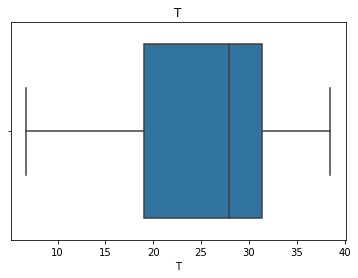

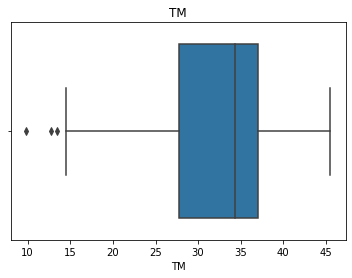

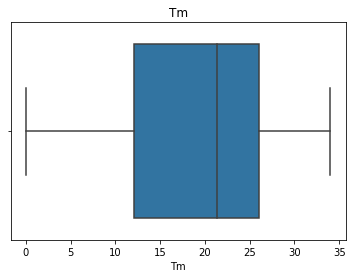

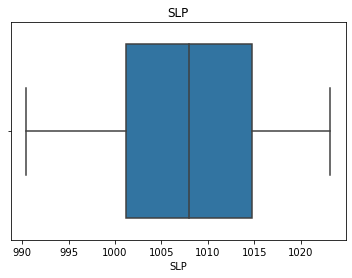

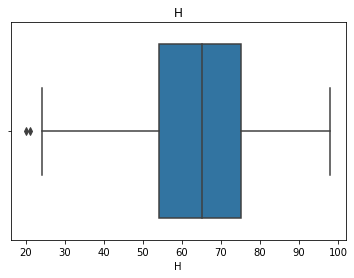

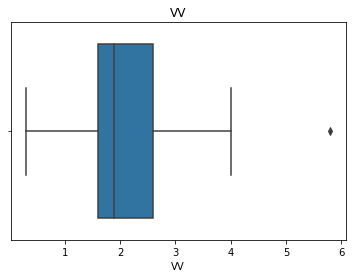

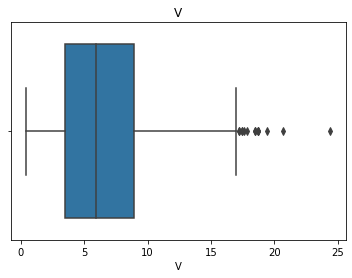

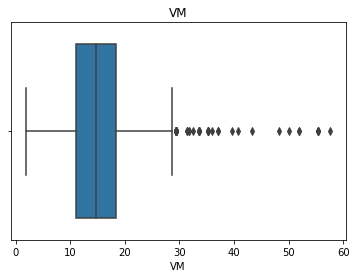

In [10]:
#lets fet the distribution of all independent variables
for col  in df.columns:
    if col != 'PM 2.5':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()


#### we can see some ouliers here

# Feature Selection & Feature Engg.

In [11]:
df.dropna(inplace=True)

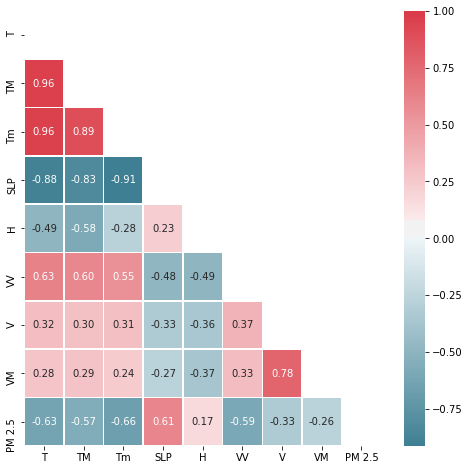

In [12]:
# Corelation Matrix with heat-map
corr = df.corr()
fig, ax= plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

**We can get the insight with the help of correlation matrix that T,TM,Tm, and W are negatively corealted and SLP is positively corealted as H, V, VM not seem much to affect the dependent feature**

In [13]:
corr.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [14]:
#lets get the independent and dependent feature seprated
X = df.drop(columns=['PM 2.5'])
y = df['PM 2.5']
print("X : {}\ny : {}".format(X.shape,y.shape))

X : (1088, 8)
y : (1088,)


In [15]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [16]:
print(model.feature_importances_)

[0.1754877  0.09268763 0.16628293 0.16511508 0.07881937 0.21909642
 0.05485367 0.04765719]


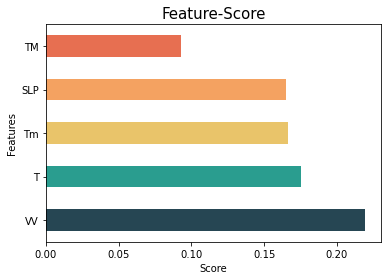

In [17]:
#lets plot a graph of feature importance
feature_importance = pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind='barh', color=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.ylabel('Features')
plt.xlabel('Score')
plt.title('Feature-Score',size=15)
plt.show()

**we will not skip any feature as the dataset is relatively small but for a big dataset this this might be useful**

# Model Building

In [18]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [19]:
X.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

**Standard Scaling Require**

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_col = ['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']
X[scale_col] = sc.fit_transform(X[scale_col])

In [21]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,-2.537103,-3.394622,-1.921910,1.281975,1.872477,-2.073174,-0.562362,-0.827897
1,-2.481651,-2.960340,-1.974769,1.401439,1.493735,-1.935829,-0.536657,-0.603152
2,-2.634143,-2.855513,-2.239064,1.520904,1.178116,-1.935829,-0.433838,-0.603152
3,-2.370749,-2.541032,-2.120131,1.427987,0.546879,-1.661140,0.414418,0.652776
4,-1.843961,-1.732368,-1.974769,1.242153,-0.147482,-0.974416,0.568646,0.864301


In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.3, random_state=0)
print("X_train:{}   y_train:{}\nX_test:{}   y_test:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

X_train:(761, 8)   y_train:(761,)
X_test:(327, 8)   y_test:(327,)


In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#y=mx+c the slope ie m wrt to each independent feature with the dependent feature ie best fit line
regressor.coef_

array([  5.30819057,   3.30025267, -43.78032155,   3.99345314,
       -11.63729703, -31.641069  ,  -7.50825817,   0.67955557])

In [25]:
#the value of c when all the independent features are zero
regressor.intercept_

110.52829825326599

In [26]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5558460401426302
Coefficient of determination R^2 <-- on test set: 0.5002132050072752


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
print(score.mean())

0.4962057187240263


**Model Evaluation**

In [28]:
#will not work if fit tranform
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
T,5.308191
TM,3.300253
Tm,-43.780322
SLP,3.993453
H,-11.637297
VV,-31.641069
V,-7.508258
VM,0.679556


**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in T is associated with an **increase** of 0.735866 in AQI PM2.5.
- Holding all other features fixed, a 1 unit increase in VV is associated with an **decrease** of -43.457359 in AQI PM 2.5.


In [29]:
prediction = regressor.predict(X_test)

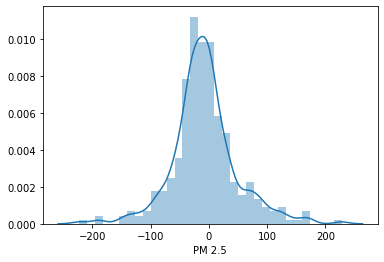

In [30]:
sns.distplot(y_test-prediction)

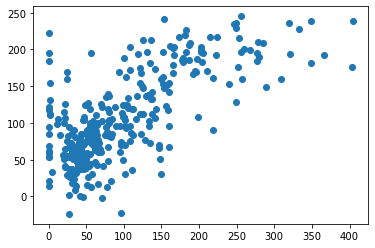

In [31]:
plt.scatter(y_test,prediction)

**All Down below are loss function**

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.54246531132521
MSE: 3226.014432469146
RMSE: 56.79801433561869


In [33]:
type(regressor)

sklearn.linear_model._base.LinearRegression

**save the wts of model**

In [34]:
# save the model to disk
import pickle
filename = 'weights/linear_regression.sav'
pickle.dump(regressor, open(filename, 'wb'))


In [35]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5002132050072752


In [36]:
loaded_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)